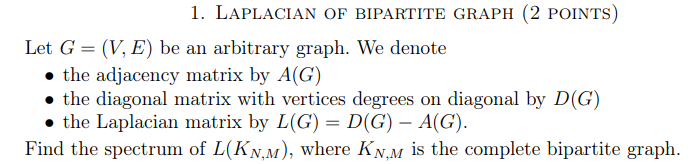

In [1]:
import networkx as nx
from networkx.algorithms.bipartite.generators import complete_bipartite_graph
from networkx.algorithms import bipartite
import matplotlib.pyplot as plt
from networkx.drawing.nx_pylab import draw
import numpy as np

In [2]:
G = complete_bipartite_graph(5,6)

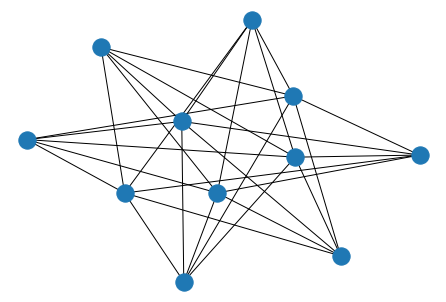

In [3]:
draw(G)

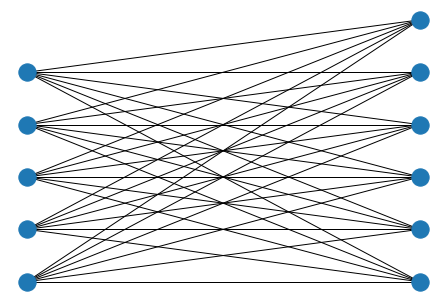

In [4]:
X, Y = bipartite.sets(G)
pos = dict()
pos.update( (n, (1, i)) for i, n in enumerate(X) ) # put nodes from X at x=1
pos.update( (n, (2, i)) for i, n in enumerate(Y) ) # put nodes from Y at x=2
nx.draw(G, pos=pos)
plt.show()

In [5]:
def get_D_matrix(G):   # сразу получим D^{-1/2}
    d = []
    for i in G:
         d.append(G.degree(i) )
    return np.diag(d)

In [6]:
A = nx.adjacency_matrix(G)

In [7]:
L = get_D_matrix(G) - A

In [8]:
L

matrix([[ 6,  0,  0,  0,  0, -1, -1, -1, -1, -1, -1],
        [ 0,  6,  0,  0,  0, -1, -1, -1, -1, -1, -1],
        [ 0,  0,  6,  0,  0, -1, -1, -1, -1, -1, -1],
        [ 0,  0,  0,  6,  0, -1, -1, -1, -1, -1, -1],
        [ 0,  0,  0,  0,  6, -1, -1, -1, -1, -1, -1],
        [-1, -1, -1, -1, -1,  5,  0,  0,  0,  0,  0],
        [-1, -1, -1, -1, -1,  0,  5,  0,  0,  0,  0],
        [-1, -1, -1, -1, -1,  0,  0,  5,  0,  0,  0],
        [-1, -1, -1, -1, -1,  0,  0,  0,  5,  0,  0],
        [-1, -1, -1, -1, -1,  0,  0,  0,  0,  5,  0],
        [-1, -1, -1, -1, -1,  0,  0,  0,  0,  0,  5]])

In [10]:
a , _ = np.linalg.eig(L)

In [12]:
a.sort()

In [13]:
a

array([8.8817842e-16, 5.0000000e+00, 5.0000000e+00, 5.0000000e+00,
       5.0000000e+00, 5.0000000e+00, 6.0000000e+00, 6.0000000e+00,
       6.0000000e+00, 6.0000000e+00, 1.1000000e+01])

# А теперь найдем это аналитически

Для $K_{N,M}$ матрица смежности $A \in \mathbb{R}^{(N + M)\times(N+M)}$ будет выглядеть так (блочная структура): $$ A = \begin{pmatrix}
   0_{N\times N} & \mathbb{1}_{N\times M}\\
   \mathbb{1}_{M\times N} & 0_{M\times M}
\end{pmatrix}$$

где $0_{N\times N}$ - нулевая матрица размера $N\times N$, а $\mathbb{1}_{M\times N}$ - матрица размера $M\times N$, у которой все элементы равны $1$.


Тогда лапласиан $L = D - A$:
$$ L = \begin{pmatrix}
   diag(M)_{N\times N} & -\mathbb{1}_{N\times M}\\
   -\mathbb{1}_{M\times N} &diag(N)_{M\times M}
\end{pmatrix}$$
где $diag(M)_{N\times N}$ - диагональная матрица размера $N\times N$, диагональные элементы которой имею значение равное $M$.

Найдем спектр матрицы Лапласа $L$. Для этого $\href{https://en.wikipedia.org/wiki/Determinant#Block_matrices}{запишем\ характерестическое\ уравнение}$ 
$$\text{det}(L - \lambda I_{n+m}) = \text{det}\begin{pmatrix}
(m - \lambda)I_n & \mathbb{1}_{n\times m}\\
\mathbb{1}_{m\times n} & (n - \lambda)I_m
\end{pmatrix} = \text{det}[(m - \lambda)I_n]\cdot\text{det}[(n - \lambda)I_m - \mathbb{1}_{m\times n}((m - \lambda)I_n))^{-1}\mathbb{1}_{n\times m}] = (m - \lambda)^n\text{det}\left[(n - \lambda)I_m - \frac{n}{m - \lambda}\mathbb{1}_{m\times m}\right].$$

Воспользуемся общей формулой для оперделителя матрицы вида: $aI_n + b\mathbb{1}_{n\times n}: det() = a^{n-1}(a + nb)$

Подставляя получаем характеристическое уравнение:

$$\text{det}(L - \lambda I_{n+m}) = (m - \lambda)^n\text{det}\left[(n - \lambda)I_m - \frac{n}{m - \lambda}\mathbb{1}_{m\times m}\right] = (m - \lambda)^n(n - \lambda)^{m - 1}\left(n - \lambda - \frac{nm}{m - \lambda}\right) = (m - \lambda)^n(n - \lambda)^{m - 1}\frac{nm - \lambda m - \lambda n + \lambda^2 - nm}{m - \lambda} = \lambda(\lambda - (m + n))(\lambda - m)^{n - 1}(\lambda - n)^{m-1}.$$

Таким образом спектр: $0$, $M+N$, $N$ ($M-1$ элементов), $M$ ($N-1$ элементов). Это все элементы спектра, поскольку их количество равно $M+N$

# задача 2

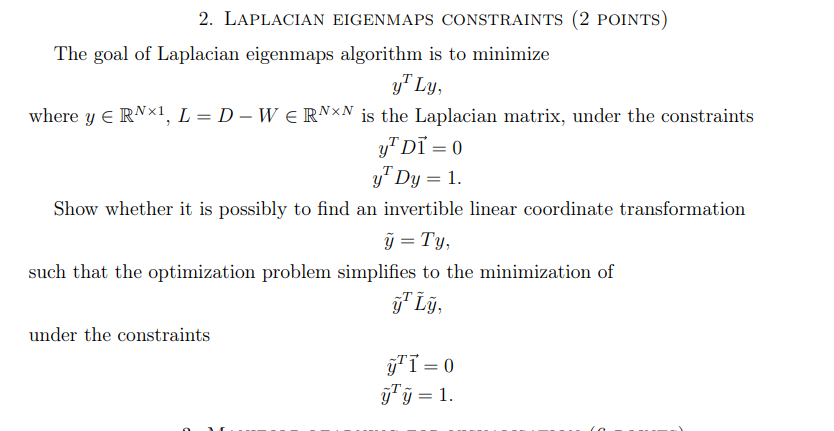

приравняв два равенства получаем 
 $$\widetilde{y}^T\widetilde{y} = y^TDy =  \widetilde{y}^T(T^{-1})^TDT^{-1}\widetilde{y}$$
 
Тогда имеем, что $D = (T^{-1})^TDT^{-1}$,а значит $T = D^{\frac{1}{2}}$.

Тогда подставим в оставшиеся уравнения 

$$y^TD\mathbb{1} = \widetilde{y}^TD^{\frac{1}{2}}\mathbb{1} = 0\\ \widetilde{y}^T\mathbb{1} = 0$$

хотим чтобы $TD^{\frac{1}{2}}\widetilde{y}$ ортогонально $\mathbb{1}$ $\rightarrow$ ортогональность $\widetilde{y}$ вектору $\mathbb{1}$

это верно только для $D = c I$, в этом случае $T = D^{\frac{1}{2}}$, в другом случае, такого $T$ нет.(ошибка)

это означает также, что вектор $\mathbb{1}$ есть собственный вектор матрицы $(T^{-1})^TD$  c ненулевым собственным значением, то есть существует $\lambda \neq 0$, что $(T^{-1})^TD\mathbb{1} = \lambda\mathbb{1}$.


Будем искать матрицу $T$ в виде $T = P D^{\frac{1}{2}}$, где $P$ - матрица поворота. Марица поворота ортогональная матрица. Поэтому 

$$ \quad 1 =  y^TDy =  \widetilde{y}^T(T^{-1})^TDT^{-1}\widetilde{y} = \widetilde{y}^T(D^{-\frac{1}{2}}P^{-1})^TDTD^{-\frac{1}{2}}P^{-1}\widetilde{y} = \widetilde{y}^T P D^{-\frac{1}{2}}DTD^{-\frac{1}{2}}P^{T}\widetilde{y} = \widetilde{y}^T\widetilde{y}$$ 

а так же: $y^TD\mathbb{1} = \widetilde{y}^T(T^{-1})^TD\mathbb{1} = \widetilde{y}^T(T^{-1})^TD\mathbb{1} = \widetilde{y}^T P D^{-\frac{1}{2}}D\mathbb{1} = \widetilde{y}^T P D^{\frac{1}{2}}\mathbb{1}$. 

тогда нужно, чтобы матрица $P$ действовала на $D^{\frac{1}{2}}\mathbb{1}$ так ($c \neq 0$): 
$$PD^{\frac{1}{2}}\mathbb{1} = c \mathbb{1}$$

$$y^TD\mathbb{1} = \widetilde{y}^T P D^{\frac{1}{2}}\mathbb{1} = c \widetilde{y}^T \mathbb{1} \rightarrow \widetilde{y}^T \mathbb{1} = 0$$

Значит, матрица $P$ -   матрица поворота, которая переводит вектор $D^{\frac{1}{2}}\mathbb{1}$ в вектор коллениарный вектору $\mathbb{1}$.

Таким, образом $\tilde{y} = PD^{1/2}y,\quad\tilde{L} =T^{-T}LT^{-1} =  PD^{-1/2}LD^{-1/2}P^T$.


# задача 3

In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import (manifold, datasets, decomposition, ensemble,
                     discriminant_analysis, random_projection, neighbors)

# load train data, save class labels, plot first point as a digit

In [30]:
digit_train = pd.read_csv('train.csv')


y_train = digit_train['label']
X_train = digit_train.drop(labels = ["label"],axis = 1) 

X_train = X_train.values
y_train = y_train.values


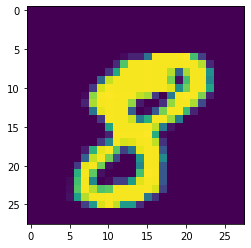

In [31]:
plt.imshow(X_train[10].reshape(28,28))
plt.show()

In [32]:
X_train.shape

(42000, 784)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


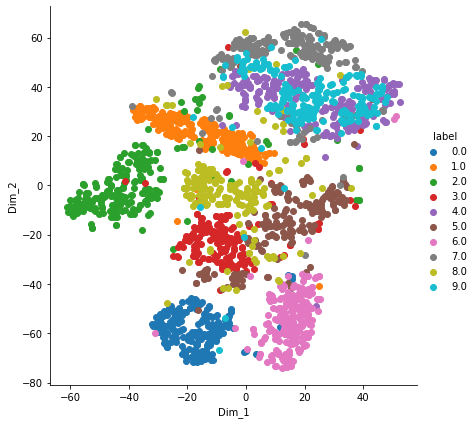

In [45]:
from sklearn.manifold import TSNE

# Picking the top 1000 points as TSNE takes a lot of time for 15K points
data_1000 = X_train[0:2000,:]
labels_2000 = y_train[0:2000]   #.apply(int())
model = TSNE(n_components=2, random_state=0)
# configuring the parameteres
# the number of components = 2
# default perplexity = 30
# default learning rate = 200
# default Maximum number of iterations for the optimization = 1000
tsne_data = model.fit_transform(data_1000)
# creating a new data frame which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, labels_1000)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=('Dim_1', 'Dim_2', 'label'))
# Ploting the result of tsne
sns.FacetGrid(tsne_df, hue='label', size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

# Isomap

In [46]:
emb = manifold.Isomap(n_neighbors=30, n_components=2)
X_iso = emb.fit_transform(X_train[:2000])
X_iso.shape

(2000, 2)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


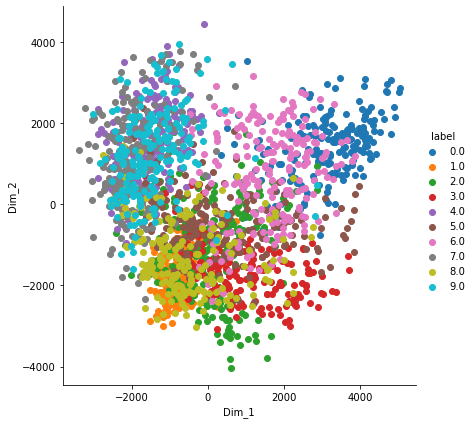

In [47]:
X_iso = np.vstack((X_iso.T, labels_2000)).T
iso_df = pd.DataFrame(data=X_iso, columns=('Dim_1', 'Dim_2', 'label'))
# Ploting the result of tsne
sns.FacetGrid(iso_df, hue='label', size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

# Locally Linear Embedding

In [51]:
emb = manifold.LocallyLinearEmbedding(n_neighbors=40, n_components=2) #, method='standard')
X_lle = emb.fit_transform(X_train[:2000])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


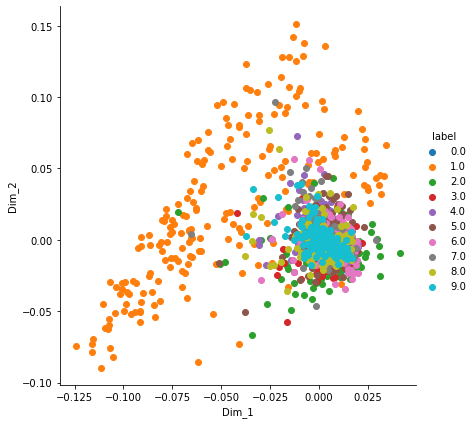

In [52]:
X_lle = np.vstack((X_lle.T, labels_2000)).T
X_lle_df = pd.DataFrame(data=X_lle, columns=('Dim_1', 'Dim_2', 'label'))
# Ploting the result of tsne
sns.FacetGrid(X_lle_df, hue='label', size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

# Spectral Embedding

In [53]:
emb = manifold.SpectralEmbedding(n_components=2)
X_se = emb.fit_transform(X_train[:2000])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


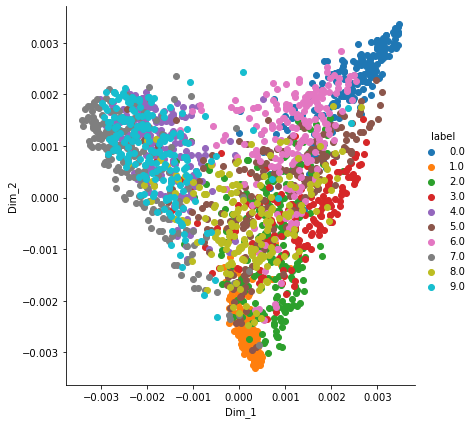

In [54]:
X_se = np.vstack((X_se.T, labels_2000)).T
X_se_df = pd.DataFrame(data=X_se, columns=('Dim_1', 'Dim_2', 'label'))
# Ploting the result of tsne
sns.FacetGrid(X_se_df, hue='label', size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

# Local Tangent Space Alignment

In [59]:
emb = manifold.LocallyLinearEmbedding(n_neighbors=20, n_components=2, eigen_solver = 'dense')
X_ltsa = emb.fit_transform(X_train[:2000])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


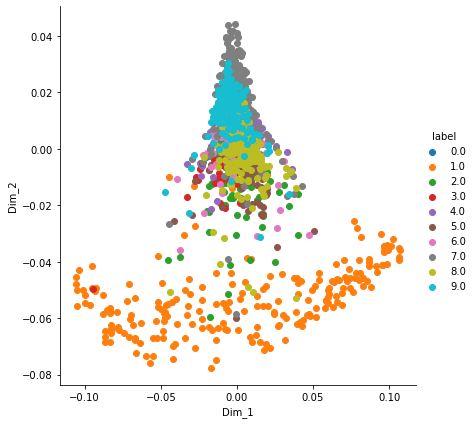

In [60]:
X_ltsa = np.vstack((X_ltsa.T, labels_2000)).T
X_ltsa_df = pd.DataFrame(data=X_ltsa, columns=('Dim_1', 'Dim_2', 'label'))
# Ploting the result of tsne
sns.FacetGrid(X_ltsa_df, hue='label', size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

# Multi-dimensional Scaling

In [61]:
emb = manifold.MDS(n_components=2)
X_mds = emb.fit_transform(X_train[:2000])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


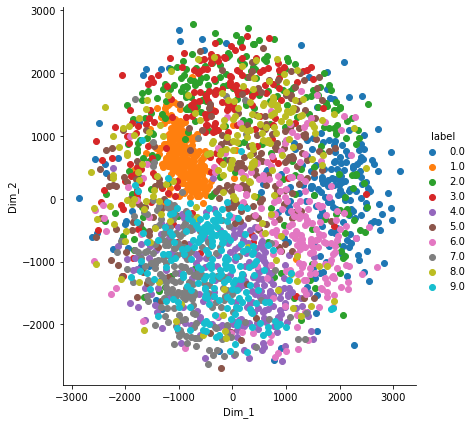

In [62]:
X_mds = np.vstack((X_mds.T, labels_2000)).T
X_mds_df = pd.DataFrame(data=X_mds, columns=('Dim_1', 'Dim_2', 'label'))

sns.FacetGrid(X_mds_df, hue='label', size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

# t-distributed Stochastic Neighbor Embedding

In [63]:
tsne = manifold.TSNE(n_components=2, random_state=0)
X_tsne = tsne.fit_transform(X_train[:2000])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


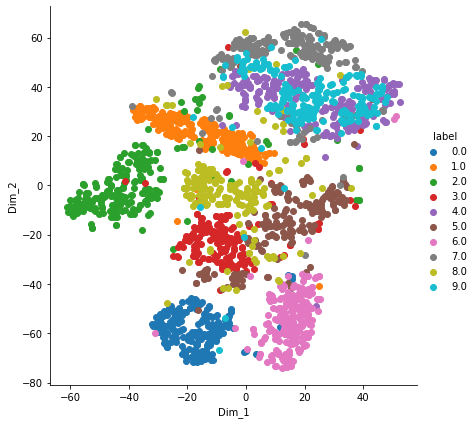

In [64]:
X_tsne = np.vstack((X_tsne.T, labels_2000)).T
X_tsne_df = pd.DataFrame(data=X_tsne, columns=('Dim_1', 'Dim_2', 'label'))

sns.FacetGrid(X_tsne_df, hue='label', size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

# Out-of-Sample Isomap

In [69]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.5, random_state=42)

emb = manifold.Isomap(n_neighbors=30, n_components=2)
emb.fit(X_train[:2000])
X_pred = emb.transform(X_val[:2000])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


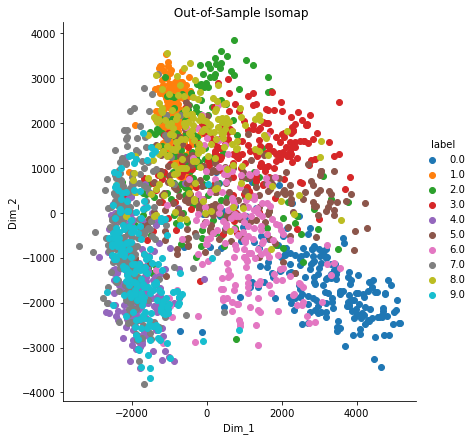

In [70]:
X_pred = np.vstack((X_pred.T, y_val[:2000])).T
X_pred_df = pd.DataFrame(data=X_pred, columns=('Dim_1', 'Dim_2', 'label'))

sns.FacetGrid(X_pred_df, hue='label', size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title('Out-of-Sample Isomap' )
plt.show()